In [344]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Machine:
    def __init__(self, task_array, time_array, id):
        self.task_array = task_array
        self.time_array = time_array
        self.id = id
        self.timetable = []

    def create_timetable(self):
        # Stworzenie listy dla pojedynczej maszyny
        prev_time = 0
        for i, task in enumerate(self.task_array):
            actual_time = prev_time + self.time_array[i]
            self.timetable.append([task, prev_time, actual_time])
            prev_time = actual_time
        return np.array(self.timetable)

In [345]:
from collections import defaultdict
class MachineOrganizer:
    def __init__(self):
        pass

    def create_timetables(self, list_of_machines):
        # Stworzenie listy z taskami
        timetables = []
        for i in range(len(list_of_machines)):
            timetables.append(list_of_machines[i].create_timetable())
        return timetables
    
    def create_gantt_graph(self, timetables_c):
        # Stworzenie grafu gantta dla bazowego przypadku
        queue = defaultdict(lambda: 0)
        num_unique_colors = len(np.arange(1, 11))
        colors = plt.cm.tab10(np.linspace(0, 1, num_unique_colors))


        _, ax = plt.subplots(figsize=(15, len(timetables_c)))
        for j in range((len(timetables_c[0]))):
            for i in range(len(timetables_c)):
                task, prev, act = timetables_c[i][j]
                # print(f'Actual task: {task}, act: {act}, prev: {prev}')
                # print(f'Actual value: {queue[task]}')

                color = colors[int(task) % len(colors)]
                if prev >= queue[task]:
                    ax.barh(f'Maszyna {i + 1}', act - prev, left=prev, height=0.3, color=color, edgecolor='k')
                    ax.text(act - (act - prev)/2, f'Maszyna {i + 1}', int(task), ha='center', va='center', color='white')
                else:
                    # print(f'Else statemetn: {(queue[task] - prev)}')
                    timetables_c[i] = [[sublist[0], sublist[1] + (queue[task] - prev), sublist[2] + (queue[task] - prev)] for sublist in timetables_c[i]]
                    # print(f'Else act: {timetables[i][j]}')
                    task, prev, act = timetables_c[i][j]
                    ax.barh(f'Maszyna {i + 1}', act - prev, left=prev, height=0.3, color=color, edgecolor='k')
                    ax.text(act - (act - prev)/2, f'Maszyna {i + 1}', int(task), ha='center', va='center', color='white')
                queue[task] = act
                # print(f'Queu value of {task} added: {queue[task]}\n')
        
        max_last = [[x[2] for x in sublist] for sublist in timetables_c]
        print(f'\n\nMax value: {max(max_last[0])}')

        ax.invert_yaxis()
        ax.grid(True)
        plt.show()

    def machine_creating(self, task_data):
        # Dodawanie taskow oraz ich czasow do arraya
        list_of_machines = []
        task_array = np.zeros((11, 50))
        task_time = np.zeros((11, 50))
        for index, row in task_data.iterrows():
            for i in range(1, 51):
                task_number = row[i]
                task_t = row[f'{i}T']
                task_array[index - 1, i - 1] = task_number
                task_time[index - 1, i - 1] = task_t
            machine = Machine(task_array[index - 1, :], task_time[index - 1, :], index-1)
            list_of_machines.append(machine)
        return list_of_machines, task_array.astype(int), task_time.astype(int)
    
    def cost_function(self, timetables_c, gen):
        # Stworzenie funkcji kosztu ktora oblicza wykonanie ostatniej czynnosci ostatniej maszyny
        queue = defaultdict(lambda: 0)

        for j in range((len(timetables_c[0]))):
            for i in gen[j]:
                task, prev, act = timetables_c[i][j]
                if prev >= queue[task]: pass
                else:
                    timetables_c[i] = [[sublist[0], sublist[1] + (queue[task] - prev), sublist[2] + (queue[task] - prev)] for sublist in timetables_c[i]]
                    task, prev, act = timetables_c[i][j]
                queue[task] = act
        max_last = [[x[2] for x in sublist] for sublist in timetables_c]
        max_last = max(max_last[0])
        # print(f'\n\nMax value: {max_last}')
        return max_last
    
    def create_gantt_graph_custom_gen(self, timetables_c, gen):
        # Stworzenie grafu gantta z uwzglednieniem genu
        queue = defaultdict(lambda: 0)
        num_unique_colors = len(np.arange(1, 11))
        colors = plt.cm.tab10(np.linspace(0, 1, num_unique_colors))


        _, ax = plt.subplots(figsize=(15, len(timetables_c)))
        for j in range((len(timetables_c[0]))):
            for i in gen[j]:
                task, prev, act = timetables_c[i][j]
                # print(f'Actual task: {task}, act: {act}, prev: {prev}')
                # print(f'Actual value: {queue[task]}')

                color = colors[int(task) % len(colors)]
                if prev >= queue[task]:
                    ax.barh(f'Maszyna {i + 1}', act - prev, left=prev, height=0.3, color=color, edgecolor='k')
                    ax.text(act - (act - prev)/2, f'Maszyna {i + 1}', int(task), ha='center', va='center', color='white')
                else:
                    # print(f'Else statemetn: {(queue[task] - prev)}')
                    timetables_c[i] = [[sublist[0], sublist[1] + (queue[task] - prev), sublist[2] + (queue[task] - prev)] for sublist in timetables_c[i]]
                    # print(f'Else act: {timetables[i][j]}')
                    task, prev, act = timetables_c[i][j]
                    ax.barh(f'Maszyna {i + 1}', act - prev, left=prev, height=0.3, color=color, edgecolor='k')
                    ax.text(act - (act - prev)/2, f'Maszyna {i + 1}', int(task), ha='center', va='center', color='white')
                queue[task] = act
                # print(f'Queu value of {task} added: {queue[task]}\n')
        
        max_last = [[x[2] for x in sublist] for sublist in timetables_c]
        print(f'\n\nMax value: {max(max_last[0])}')

        ax.invert_yaxis()
        ax.grid(True)
        plt.show()

In [499]:
import random
from collections import defaultdict

class GA:
    def __init__(self, timetables_c, morg: MachineOrganizer):
        self.GEN_AMOUNT = 2
        self.MAX_ITER = 1
        self.CROSS_PROB = 0.8
        self.MUTATION_PROB = 0.2
        self.BEST_PART = 0.2
        self.gen_list = []
        self.timetable = timetables_c
        self.morg = morg
        self.cost_list = []


    def create_random_gens(self):
        random_order = list(range(11))
        random.shuffle(random_order)
        # timetables_list = []
        self.gen_list = []

        for _ in range(self.GEN_AMOUNT):
            # act_timetable = []
            gen = []

            for i in range(50):
                # for j in random_order:
                    # act_timetable.append(timetables_c[j][i])
                gen += [random_order.copy()]
                random.shuffle(random_order)

            # timetables_list.append(act_timetable)
            self.gen_list.append(gen)
        return self.gen_list
    
    def gantt_graphs(self, timetables_list):
        for timetable in timetables_list:
            print(timetable[0])
            self.morg.create_gantt_graph(timetable)
    
    def create_sorted_cost_dict(self):
        cost_list = []
        cost_list_2 = []
        for i in range(len(self.gen_list)):
            timetable = self.timetable.copy()
            cost = self.morg.cost_function(timetable, self.gen_list[i])
            cost_list.append(cost)
        
        for i, gen in enumerate(self.gen_list):
            cost_list_2.append([cost_list[i], gen])
        print(f'{cost_list_2}\n')
        cost_list_2 = sorted(cost_list_2, key=lambda x: x[0])

        return cost_list_2

    
    def replace_the_worst(self):
        # Zastapienie (self.BEST_PART*self.GEN_AMOUNT) najgorzyszch najlepszymi
        self.cost_list = self.create_sorted_cost_dict()
        self.cost_list[-int(self.BEST_PART*self.GEN_AMOUNT):] = self.cost_list[:int(self.BEST_PART*self.GEN_AMOUNT)]
        return self.cost_list
    
    def crossing_gens(self):
        new_gen_list = []
        for i in range(int(len(self.gen_list)/2)):
            crossing_boolean = random.choices([True, False], weights=[self.CROSS_PROB, (1-self.CROSS_PROB)])
            if crossing_boolean:
                crossing_partner = random.choice(range(self.GEN_AMOUNT))
                while crossing_partner == i:
                    crossing_partner = random.choice(range(self.GEN_AMOUNT))
                print(f'Crossing partner: {crossing_partner}')
                print(f'Crossing actual: {i}')
                crossing_part_1 = random.choice(range(50))
                crossing_part_2 = random.choice(range(crossing_part_1, 50))
                print(f'Cr1: {crossing_part_1}, cr2: {crossing_part_2}\n')

                gen_copy_actual = self.gen_list[i].copy()
                gen_copy_partner = self.gen_list[crossing_partner].copy()
                copy_gen = gen_copy_actual[crossing_part_1:crossing_part_2]
                gen_copy_actual[crossing_part_1:crossing_part_2] = gen_copy_partner[crossing_part_1:crossing_part_2]
                gen_copy_partner[crossing_part_1:crossing_part_2] = copy_gen
                indexes_to_pop = [i, crossing_partner]
                indexes_to_pop.sort(reverse=True)
                [self.gen_list.pop(index) for index in indexes_to_pop]

                new_gen_list.append(gen_copy_actual)
                new_gen_list.append(gen_copy_partner)
        self.gen_list = new_gen_list.copy()
        return new_gen_list
                

In [482]:
# Ladowanie oraz obrobka danych
columns = []
for i in range(1, 51):
    columns.append(i)
    columns.append(str(i) + 'T')
task_data = pd.read_excel('GA_task.xlsx')
task_data.columns = columns
task_data = task_data.drop(task_data.index[0])

morg = MachineOrganizer()
list_of_machines, task_array, task_time = morg.machine_creating(task_data)
timetables = morg.create_timetables(list_of_machines)



Max value: 2815.0


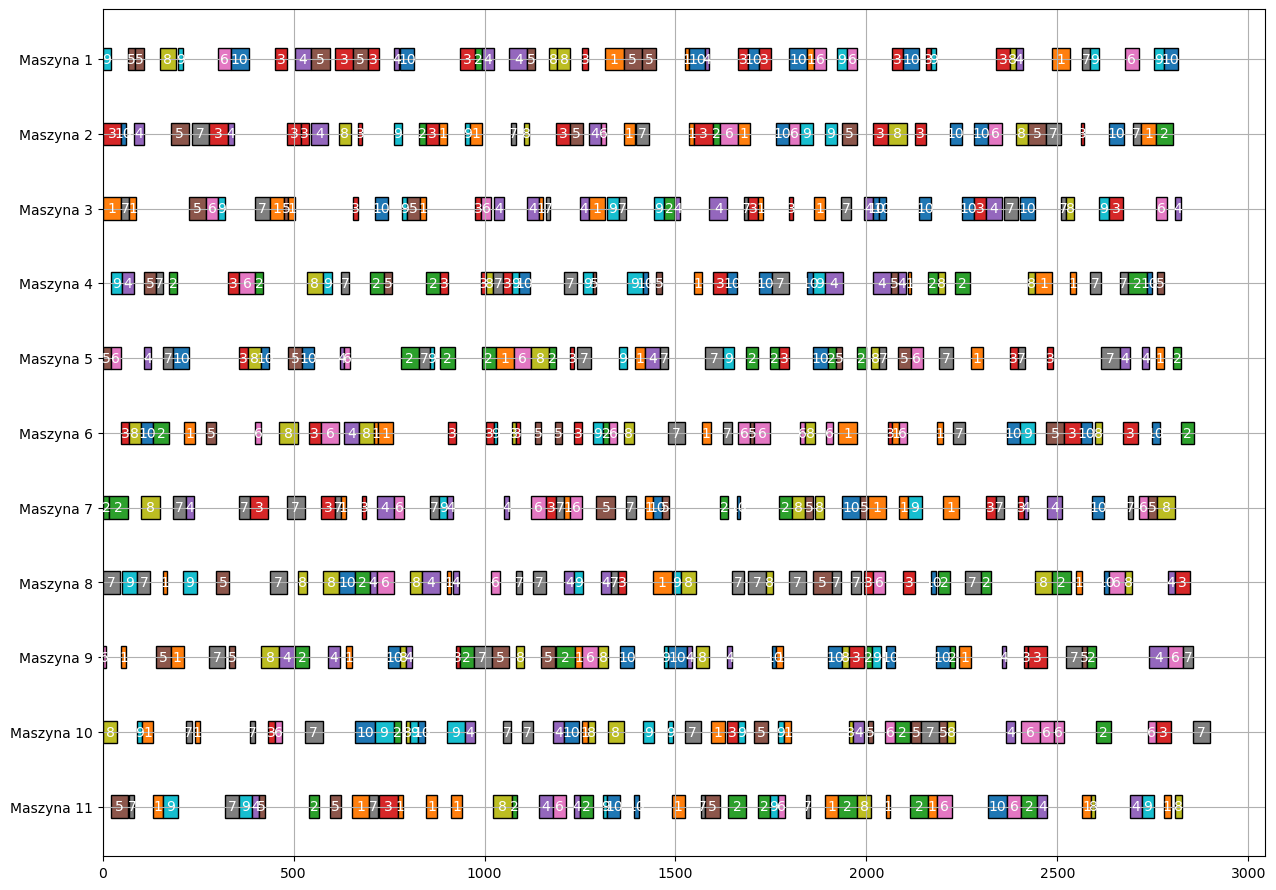

In [479]:
# timetables = morg.create_timetables(list_of_machines)
timetables_copy = timetables.copy()
morg.create_gantt_graph(timetables_copy)
# cost = morg.cost_function(timetables)

### Alogrytm polega na zmianie kolejnosci piorytetow wykonywania maszyn w poszczegolnej iteracji kolumny.

In [500]:
timetables_copy = timetables.copy()
ga = GA(timetables_copy, morg)
gen2 = ga.create_random_gens()

for row in gen2:
    print(row)

cost_list = ga.create_sorted_cost_dict()

cost_list_copied = ga.replace_the_worst()

new_gen_list = ga.crossing_gens()

for row in new_gen_list:
    print(row)

[[5, 3, 1, 10, 4, 0, 9, 2, 7, 8, 6], [10, 4, 6, 1, 5, 3, 0, 9, 7, 2, 8], [0, 2, 3, 9, 5, 1, 4, 7, 6, 8, 10], [8, 0, 4, 2, 7, 10, 9, 1, 3, 6, 5], [1, 6, 4, 8, 7, 9, 0, 10, 2, 3, 5], [10, 0, 3, 8, 9, 6, 2, 4, 5, 7, 1], [3, 2, 10, 8, 0, 7, 1, 4, 9, 5, 6], [2, 4, 3, 6, 9, 1, 5, 7, 10, 0, 8], [6, 3, 1, 7, 2, 4, 9, 10, 0, 5, 8], [1, 5, 9, 0, 2, 4, 10, 6, 3, 8, 7], [8, 10, 7, 3, 0, 9, 2, 4, 5, 6, 1], [7, 8, 1, 6, 4, 0, 10, 3, 5, 9, 2], [6, 2, 4, 0, 1, 8, 9, 5, 10, 3, 7], [0, 7, 3, 10, 1, 9, 4, 6, 8, 2, 5], [10, 8, 4, 5, 2, 0, 3, 1, 6, 9, 7], [3, 9, 0, 6, 10, 4, 8, 1, 7, 5, 2], [1, 6, 8, 7, 0, 9, 2, 4, 3, 5, 10], [0, 5, 6, 2, 10, 8, 4, 9, 3, 7, 1], [5, 7, 2, 1, 6, 9, 0, 10, 8, 4, 3], [3, 9, 2, 6, 10, 1, 4, 5, 8, 7, 0], [10, 3, 6, 0, 4, 9, 7, 8, 2, 1, 5], [5, 7, 0, 2, 6, 10, 1, 9, 4, 8, 3], [1, 7, 9, 8, 5, 4, 3, 6, 10, 2, 0], [0, 2, 3, 1, 5, 4, 8, 10, 6, 7, 9], [10, 1, 0, 6, 5, 8, 3, 2, 7, 9, 4], [2, 10, 9, 3, 1, 5, 6, 8, 7, 4, 0], [4, 5, 7, 3, 1, 6, 8, 0, 2, 10, 9], [1, 10, 5, 4, 2, 3, 9, 7, 8

In [502]:
crossing_part_1 = random.choice(range(10))
crossing_part_2 = random.choice(range(crossing_part_1, 10))
crrosing_part = (crossing_part_1, crossing_part_2)
# print(crrosing_part)
# lsita = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# lsita[crossing_part_1:crossing_part_2] = 12
# lsita.remove(2)

In [503]:
my_list = [1, 2, 3, 4, 5]

# Indexes to pop
indexes_to_pop = [3, 1]

# Sort indexes in descending order to avoid index shifting
indexes_to_pop.sort(reverse=True)

# Pop items from the list one by one
popped_items = [my_list.pop(index) for index in indexes_to_pop]

print("Popped items:", popped_items)
print("Modified list:", my_list)

Popped items: [4, 2]
Modified list: [1, 3, 5]
